In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator (
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
    
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    
)

Found 847 images belonging to 4 classes.


In [69]:
train_generator.class_indices

{'Alluvial Soil': 0, 'Black Soil': 1, 'Clay Soil': 2, 'Red Soil': 3}

In [70]:
class_names = list(train_generator.class_indices.keys())
class_names

['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']

In [71]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.44869745 0.44241792 0.3263345 ]
  [0.45014194 0.44375923 0.32757264]
  [0.45158643 0.44510058 0.32881078]
  ...
  [0.09095726 0.13101125 0.03757765]
  [0.12638254 0.19387802 0.04712237]
  [0.14350943 0.24316224 0.06038716]]

 [[0.39068994 0.3914552  0.28085425]
  [0.3923408  0.3927965  0.2819892 ]
  [0.39399165 0.39413783 0.28312415]
  ...
  [0.09064772 0.13142397 0.03664904]
  [0.12813659 0.1963543  0.04815416]
  [0.14309673 0.24367815 0.06028398]]

 [[0.3529412  0.36234525 0.26114562]
  [0.3529412  0.36224207 0.26073292]
  [0.3529412  0.3621389  0.26032022]
  ...
  [0.09033819 0.13183668 0.03572044]
  [0.12989062 0.19883057 0.04918594]
  [0.142684   0.24419405 0.06018081]]

 ...

 [[0.20392159 0.19607845 0.28235295]
  [0.20392159 0.19607845 0.28235295]
  [0.20256703 0.19472387 0.27964383]
  ...
  [0.19607845 0.20000002 0.28235295]
  [0.19607845 0.20000002 0.28235295]
  [0.19607845 0.20000002 0.28235295]]

 [[0.20392159 0.19607845 0.28235295]
  [0.20392159 0.19607845 0.28235295]


In [72]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 119 images belonging to 4 classes.


In [73]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 247 images belonging to 4 classes.


In [74]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.25309232 0.28446487 0.20578194]
  [0.270149   0.30267337 0.20117866]
  [0.30135578 0.33779716 0.22340418]
  ...
  [0.5551251  0.5723679  0.56296825]
  [0.5604186  0.5780396  0.56826174]
  [0.56571215 0.5837112  0.5735553 ]]

 [[0.25082368 0.28219622 0.20483667]
  [0.2727957  0.30513105 0.20420352]
  [0.28982347 0.3260758  0.21243902]
  ...
  [0.63617384 0.6627981  0.64324325]
  [0.6344723  0.66185284 0.6413527 ]
  [0.6327709  0.66090757 0.6394622 ]]

 [[0.24855502 0.27992755 0.2038914 ]
  [0.27544248 0.30758876 0.20722838]
  [0.27829117 0.31435445 0.20147388]
  ...
  [0.61938053 0.6585962  0.6240713 ]
  [0.62221634 0.661432   0.6270961 ]
  [0.62505215 0.66426784 0.630121  ]]

 ...

 [[0.6501877  0.583521   0.40867746]
  [0.63997877 0.5733121  0.39884663]
  [0.6297698  0.56310314 0.3890158 ]
  ...
  [0.81191635 0.75309277 0.5844653 ]
  [0.8259036  0.76708007 0.5953047 ]
  [0.6922895  0.6366092  0.4577736 ]]

 [[0.62147224 0.56034505 0.3850263 ]
  [0.6237409  0.56299186 0.38748398]


In [76]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (256, 256, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [77]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
847/32

26.46875

In [21]:
119/32

3.71875

In [79]:
history = model.fit(
    train_generator,
    steps_per_epoch=26,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=3,
    verbose=1,
    epochs=20
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 833ms/step - accuracy: 0.3824 - loss: 1.2481 - val_accuracy: 0.6042 - val_loss: 0.8529
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6562 - loss: 0.9368 - val_accuracy: 0.6458 - val_loss: 0.7896
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 882ms/step - accuracy: 0.6529 - loss: 0.7789 - val_accuracy: 0.7604 - val_loss: 0.5638
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.7188 - loss: 0.6136 - val_accuracy: 0.6771 - val_loss: 0.7364
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 24s 905ms/step - accuracy: 0.7578 - loss: 0.5889 - val_accuracy: 0.7396 - val_loss: 0.5174
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8750 - loss: 0.4484 - val_accuracy: 0.7708 - val_loss: 0.5316
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 871ms/step - accuracy: 0.7839 - loss: 0.5251 - val_accuracy: 0.7604 - val_loss: 0.4393
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6250 - loss: 0.5933 - val_accuracy: 0.

In [80]:
scores=model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step - accuracy: 0.8473 - loss: 0.3592


In [81]:
scores

[0.3455641567707062, 0.8582996129989624]

In [82]:
history

In [83]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 26}

In [84]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [85]:
type(history.history['loss'])

list

In [86]:
len(history.history['loss'])

20

In [87]:
history.history['loss'][:5] #show loss for first 5 epochs

[1.1231557130813599,
 0.9368236660957336,
 0.7583957314491272,
 0.6135554313659668,
 0.5717344284057617]

In [88]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [89]:
val_acc

[0.6041666865348816,
 0.6458333134651184,
 0.7604166865348816,
 0.6770833134651184,
 0.7395833134651184,
 0.7708333134651184,
 0.7604166865348816,
 0.7604166865348816,
 0.7916666865348816,
 0.78125,
 0.8125,
 0.8229166865348816,
 0.7708333134651184,
 0.7604166865348816,
 0.84375,
 0.8229166865348816,
 0.7395833134651184,
 0.7604166865348816,
 0.8020833134651184,
 0.8020833134651184]

In [90]:
acc

[0.48711657524108887,
 0.65625,
 0.7067484855651855,
 0.71875,
 0.7582821846008301,
 0.875,
 0.7963190078735352,
 0.625,
 0.7828220725059509,
 0.90625,
 0.8233128786087036,
 0.6875,
 0.7938650250434875,
 0.78125,
 0.838036835193634,
 0.78125,
 0.832932710647583,
 0.8666666746139526,
 0.8638036847114563,
 0.90625]

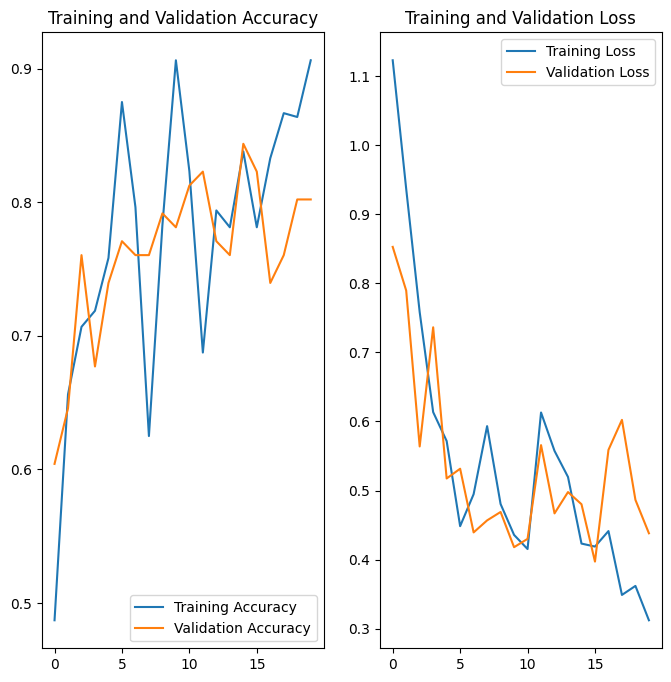

In [91]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Red Soil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
predicted label: Red Soil


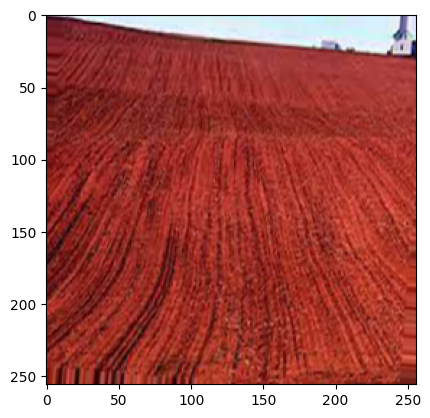

In [96]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
model.save("../soils.h5")